# Problem Statement-

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year

In [66]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [67]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Observation-
The features in the above data set are-
- Age

- Workclass

- Fnlwgt (Final Weight)

- Education

- Education_num

- Marital status

- Occupation

- Relationship

- Race

- Sex

- Capital gain

- Capital loss

- Hours per week

- Native Country

The label in the given dataset is-
- Income

In [68]:
#shape of file
data.shape

(32560, 15)

In [69]:
# Checking for data types of the columns
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [70]:
#Checking for null values
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# 
There are no null values

# Visualization of the Data

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


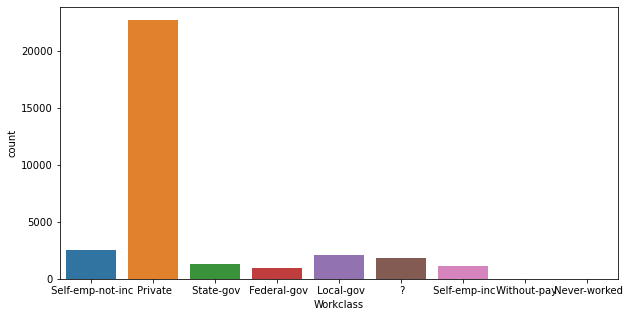

In [71]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Workclass", data=data)
print(data["Workclass"].value_counts())

# 
22696 people work pivately, 2541 people are self employed not incorporated, 2093 people work for local government, 1297 work for state government, 1116 people are self employed and incorporated, 960 work for federal government, 14 people work without pay, 7 people have never worked.

The workclass of 1836 people are not known and will have to be imputed          

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


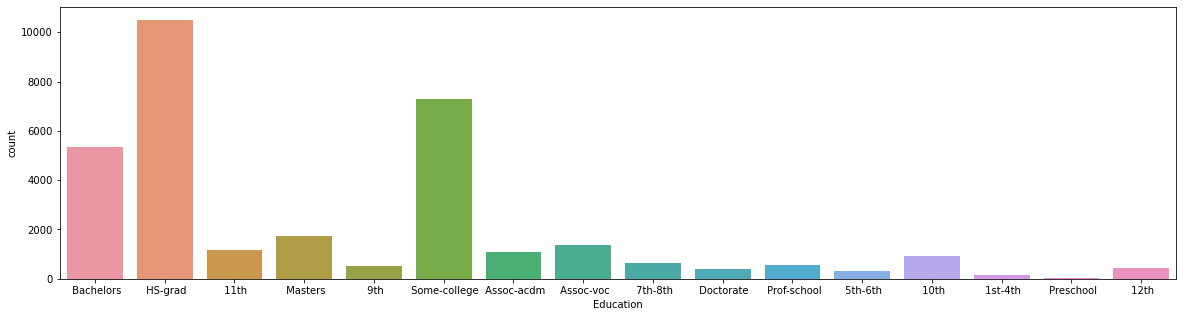

In [72]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x="Education", data=data)
print(data["Education"].value_counts())

# 
10501 are High school graduates, 7291 are college graduates, 5354 are bacherlor graduates, 1723 are Master graduates, 1382 are Assoc-voc, 1175 are 11 pass, 1067 are Assoc-adm, 933 are 10 pass, 646 are 7-8 class pass, 576 are Prof-school graduates, 514 are 9th class pass, 433 are 12th class pass, 413 are doctorates, 333 are 5-6 class pass, 168 are 1-4 class pass, 51 are preschool pass  
         

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


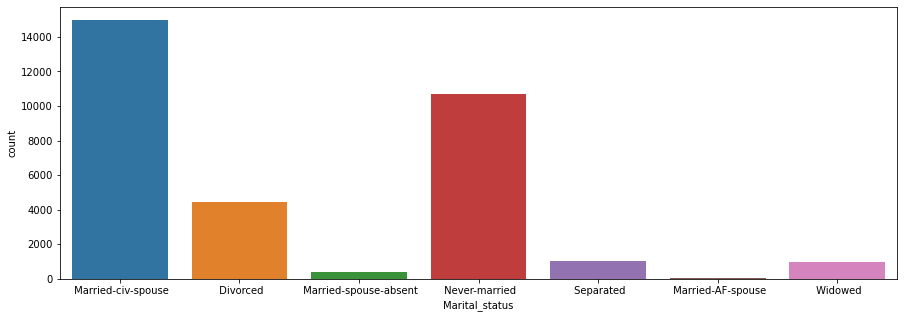

In [73]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="Marital_status", data=data)
print(data["Marital_status"].value_counts())

# 
14976 are married to a civilian spouse, 10682 are unmarried, 4443 are divorced, 1025 are separated, 993 are widowed, 418 are married with spouse living far away due to personal or professional reasons, 23 are married to spouse in armed forces

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


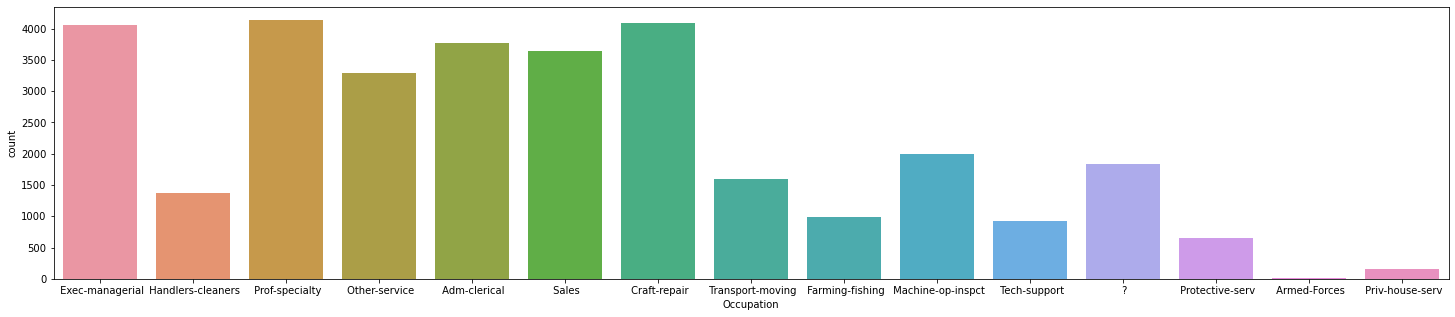

In [74]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="Occupation", data=data)
print(data["Occupation"].value_counts())

# 
4140 are professional speciality, 4099 are into craft-repair, 4066 are managerial executives, 3769 are administrative clerks, 3650 are into sales, 3295 are into other services, 2002 are machine operation inspector, 1597 are into transport, 1370 are handlers-cleaners, 994 are into farming-fishing, 928 are into technical support, 649 are protectives service provider, 149 are private house service provider, 9 work in armed forces

The occupation of 1843 people are not known and will have to be imputed         
          

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


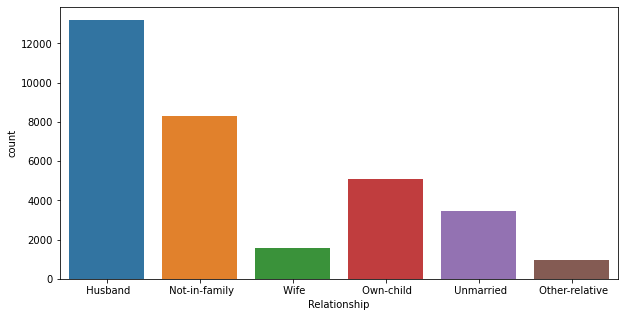

In [75]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Relationship", data=data)
print(data["Relationship"].value_counts())

# 
13193 were the husband,  8304 was not in family, 5068 was the own child, 3446 was unmarried, 1568 were the wife, 981 were other relative
 

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


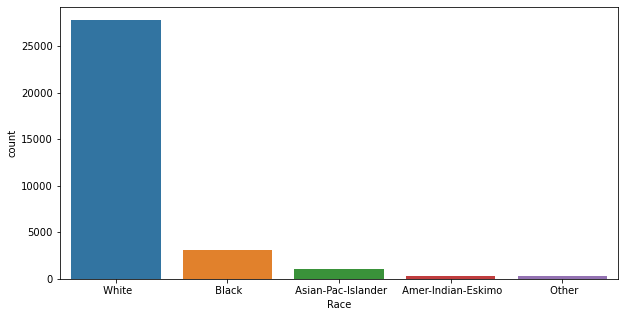

In [76]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Race", data=data)
print(data["Race"].value_counts())

# 
27815 are white, 3124 are black, 1039 are Asian-Pac-Islander, 311 are America,-Indian-Eskimo, 271 are others

 Male      21789
 Female    10771
Name: Sex, dtype: int64


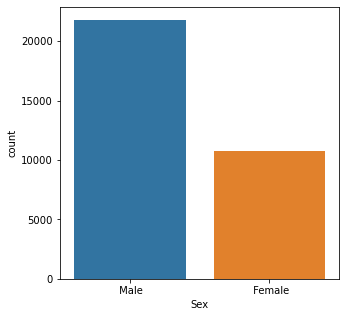

In [77]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Sex", data=data)
print(data["Sex"].value_counts())

# 
21789 are males, 10771 are females   

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

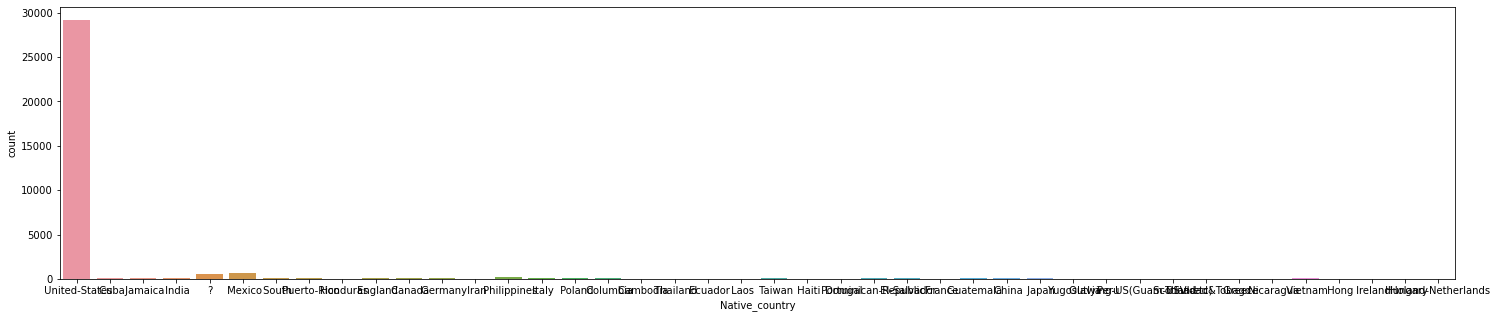

In [78]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="Native_country", data=data)
print(data["Native_country"].value_counts())

# 
29169 are natives of United-States, 643 are natives of Mexico, 198 are natives of Philippines, 137 are natives of Germany, 121 are natives of Canada, 114 are natives of Puerto-Rico, 106 are natives of El-Salvador, 100 are natives of India, 95 are natives of Cuba, 90 are natives of England, 81 are natives of Jamaica, 80 are natives of the South
75 are natives of China, 73 are natives of Italy, 70 are natives of Dominican-Republic, 67 are natives of Vietnam, 64 are natives of Guatemala, 62 are natives of Japan, 60 are natives of Poland, 59 are natives of Columbia, 51 are natives of Taiwan 44 are natives of Haiti, 43 are natives of Iran, 37 are natives of Portugal, 34 are natives of Nicaragua,31 are natives of Peru, 29 are natives of Peru, 29 are natives of Greece, 28 are natives of Ecuador, 24 are natives of Ireland, 20 are natives of Hong, 19 are natives of Cambodia, 19 are natives of Trinadad&Tobago,18 are natives of Laos, 18 are natives of Thailand,  16 are natives of Yugoslavia, 14 are natives of Outlying-US(Guam-USVI-etc), 13 are natives of Honduras, 13 are natives of Hungary, 12 are natives of Scotland, 1 is a native of Holand-Netherlands

The nationality of 583 people are not known and will have to be imputed

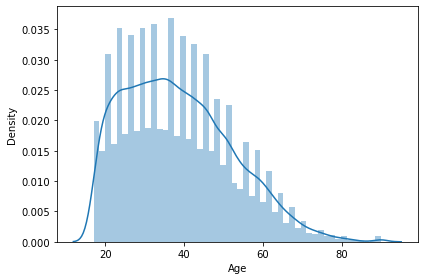

In [107]:
sns.distplot(data["Age"])
plt.xlabel("Age",fontsize=10)
plt.tight_layout()

# 
The data seems skewed and will be dealt later

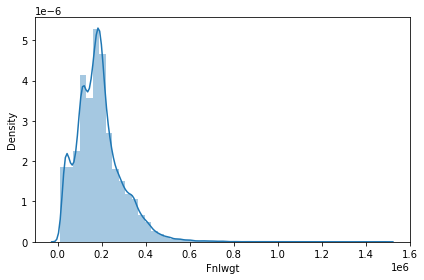

In [80]:
sns.distplot(data["Fnlwgt"])
plt.xlabel("Fnlwgt",fontsize=10)
plt.tight_layout()

# 
The data seems skewed and will be dealt later

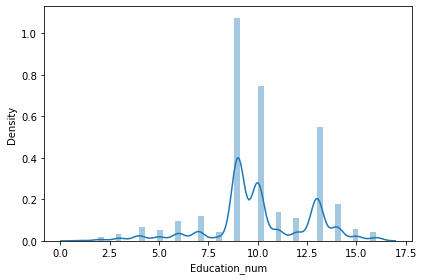

In [81]:
sns.distplot(data["Education_num"])
plt.xlabel("Education_num",fontsize=10)
plt.tight_layout()

# 
The data is highly skewed and will be dealt later

<AxesSubplot:ylabel='Frequency'>

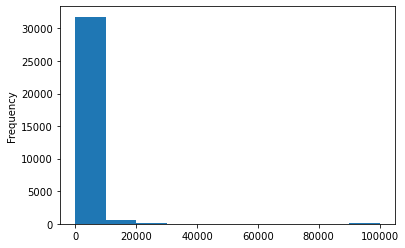

In [82]:
data.Capital_gain.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

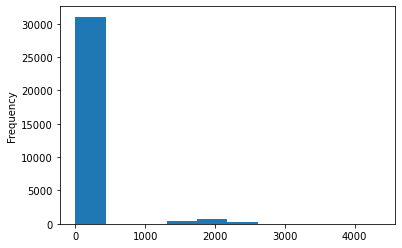

In [83]:
data.Capital_loss.plot(kind='hist')

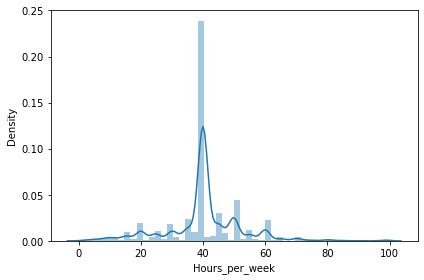

In [84]:
sns.distplot(data["Hours_per_week"])
plt.xlabel("Hours_per_week",fontsize=10)
plt.tight_layout()

# 
The data is skewed

# Encoding object data into numeric data

In [85]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for column in data:
    if data[column].dtype=='object':
        df=enc.fit_transform(data[column])
        data[column]=df

In [86]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# Observation-

The categorical data for the below features have been encoded into numeric based on alphabetic order as follows-

- Workclass-
       - 0- Not known
       - 1- Federal Gov
       - 2- Local-Goc
       - 3- Never-worked
       - 4- Private
       - 5- Self-emp-inc
       - 6- Self-emp-not-inc
       - 7- State-gov
       - 8- Without pay
    
- Education-
       - 0- 10 pass
       - 1- 11 pass
       - 2- 12 pass
       - 3- 1st-4th
       - 4- 5th-6th 
       - 5- 7th-8th
       - 6- 9th
       - 7- Assoc-acdm
       - 8- Assoc-voc
       - 9- Bachelors
       -10- Doctorate
       -11- HS-grad
       -12- Masters
       -13- Preschool
       -14- Prof-school
       -15- Some-college

- Marital_status-
       - 0- Divorced
       - 1- Married-AF-spouse
       - 2- Married-civ-spouse
       - 3- Married-spouse-absent
       - 4- Never-married 
       - 5- Separated
        
- Occupation-
       - 0- Not known
       - 1- Adm-clerical
       - 2- Armed-Forces
       - 3- Craft-repair
       - 4- Exec-managerial 
       - 5- Farming-fishing
       - 6- Handlers-cleaners
       - 7- Machine-op-inspct
       - 8- Other-service
       - 9- Priv-house-serv
       -10- Prof-specialty
       -11- Protective-serv
       -12- Sales
       -13- Tech-support
       -14- Transport-moving

- Relationship-
       - 0- Husband
       - 1- Not-in-family
       - 2- Other-relative
       - 3- Own-child
       - 4- Unmarried 
       - 5- Wife

- Race-
       - 0- Amer-Indian-Eskimo
       - 1- Asian-Pac-Islander
       - 2- Black
       - 3- Other
       - 4- White
    
- Sex-
       - 0- Female
       - 1- Male
        
- Native_country-
       - 0- Not known
       - 1- Cambodia
       - 2- Canada
       - 3- China
       - 4- Columbia 
       - 5- Cuba
       - 6- Dominican-Republic
       - 7- Ecuador
       - 8- El-Salvador
       - 9- England
       -10- France
       -11- Germany
       -12- Greece
       -13- Guatemala
       -14- Haiti
       -15- Holand-Netherlands
       -16- Honduras 
       -17- Hong
       -18- Hungary
       -19- India
       -20- Iran  
       -21- Ireland
       -22- Italy
       -23- Jamaica
       -24- Japan
       -25- Laos
       -26- Mexico
       -27- Nicaragua
       -28- Outlying-US(Guam-USVI-etc)
       -29- Peru
       -30- Philippines
       -31- Poland
       -32- Portugal
       -33- Puerto-Rico
       -34- Scotland
       -35- South
       -36- Taiwan  
       -37- Thailand
       -38- Trinadad&Tobago
       -39- United-States
       -40- Vietnam  
       -41- Yugoslavia

- Income-
       - 0- <=50K
       - 1- >50K

# Imputing the unknowns

In [87]:
#Replacing the notknown values as NAN to be subjected to imputing

data['Workclass']=data['Workclass'].replace(0,np.nan)
data['Occupation']=data['Occupation'].replace(0,np.nan)
data['Native_country']=data['Native_country'].replace(0,np.nan)

In [88]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [93]:
#Imputing using KNN Imputer to replace NANS with meaningful data

from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(data[['Age','Workclass','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']]), columns=['Age','Workclass','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income'])
data['Workclass']=df['Workclass'].astype(int)
data['Occupation']=df['Occupation'].astype(int)
data['Native_country']=df['Native_country'].astype(int)

In [98]:
#Statistical Analysis
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,4.087101,1.897818e+05,10.298249,10.080590,2.611794,6.947850,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,37.372420,0.240817
std,13.640642,1.120150,1.055498e+05,3.870317,2.572709,1.506225,3.952129,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.091202,0.427586
min,17.000000,1.000000,1.228500e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Checking Correlation

In [99]:
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.036941,-0.076646,-0.010508,0.036527,-0.266292,-0.008250,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.000245,0.234039
Workclass,0.036941,1.000000,-0.025413,0.004521,0.005248,-0.022919,0.012460,-0.058598,0.049218,0.073728,0.032489,0.001876,0.045090,-0.003548,0.004684
Fnlwgt,-0.076646,-0.025413,1.000000,-0.028156,-0.043159,0.028184,-0.000491,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.064369,-0.009481
Education,-0.010508,0.004521,-0.028156,1.000000,0.359172,-0.038398,-0.034486,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076873,0.079311
Education_num,0.036527,0.005248,-0.043159,0.359172,1.000000,-0.069338,0.087361,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088901,0.335182
Marital_status,-0.266292,-0.022919,0.028184,-0.038398,-0.069338,1.000000,0.020457,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021735,-0.199295
Occupation,-0.008250,0.012460,-0.000491,-0.034486,0.087361,0.020457,1.000000,-0.052346,-0.000883,0.060804,0.021652,0.014455,0.020813,-0.003386,0.050089
Relationship,-0.263698,-0.058598,0.008922,-0.010879,-0.094145,0.185461,-0.052346,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010386,-0.250924
Race,0.028718,0.049218,-0.021278,0.014135,0.031825,-0.068025,-0.000883,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.121789,0.071853
Sex,0.088832,0.073728,0.026882,-0.027349,0.012256,-0.129337,0.060804,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.001686,0.215995


# 
For better understanding let's use a heat map

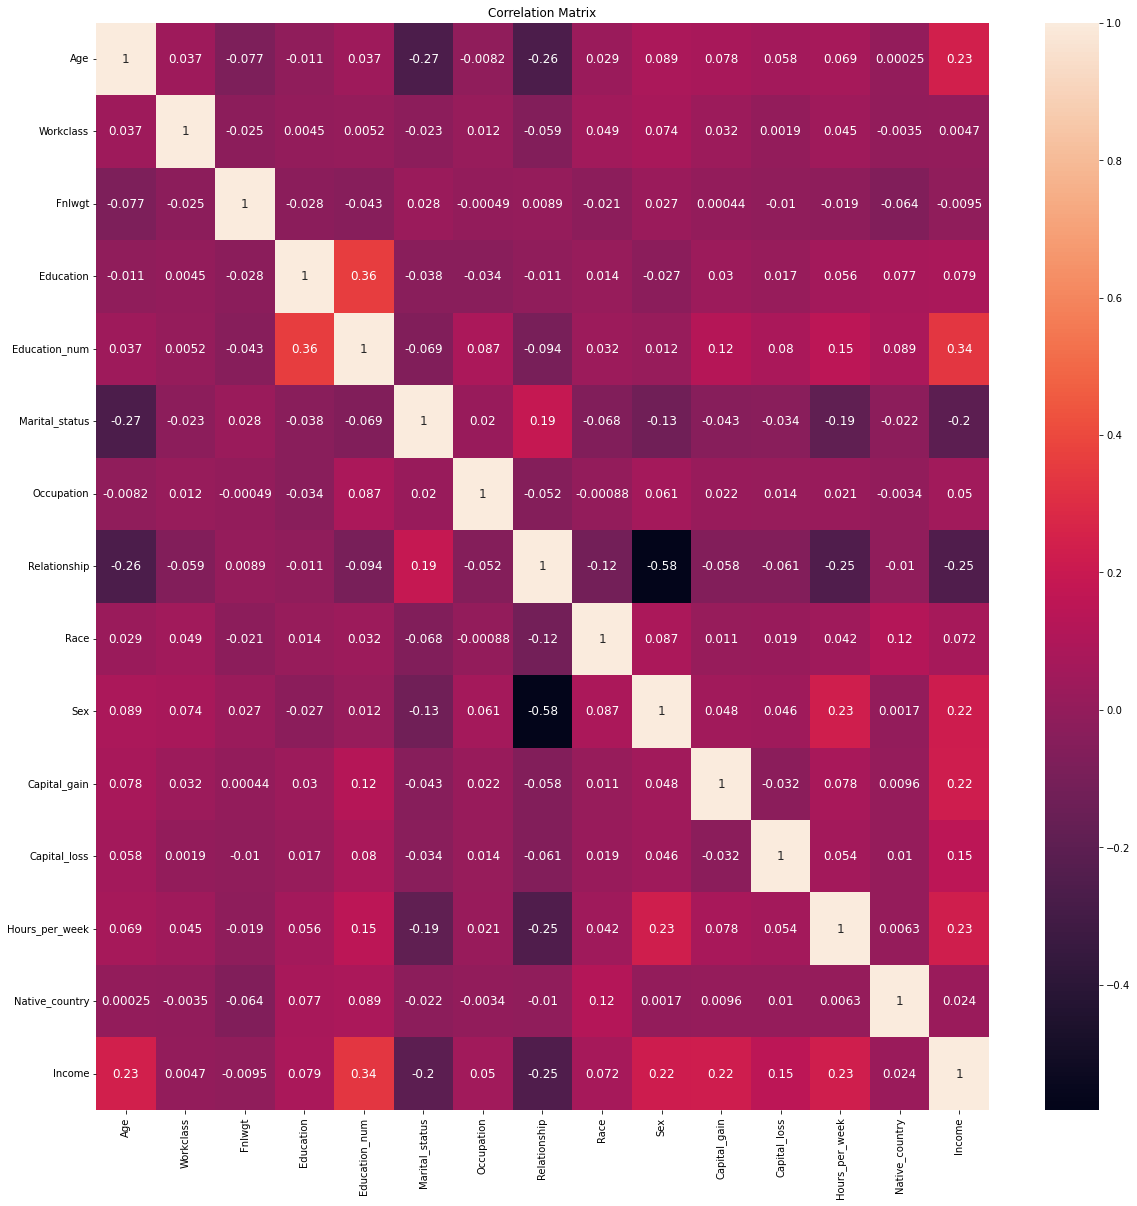

In [100]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-
Let's print the correlation values of independent values with target variable for a better understanding

In [102]:
corr_matrix=data.corr()
corr_matrix["Income"].sort_values(ascending=True)

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.004684
Native_country    0.024373
Occupation        0.050089
Race              0.071853
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

# Observation-
- Relationship, Marital_status and Fnlwgt are negatively correlated to the label Income
- Features Workclass, Native_country, Occupation, Race, Education, Capital_loss, Sex, Capital_gain, Hours_per_week, Age and Education_num are positively correlated to the label Loan_Status
- Relationship is 25% negatively correlated with Loan_Status showing a moderately weak bond
- Fnlwgt is 0.9% negatively correlated with Loan_Status showing an extremely weak bond
- Education_num is 33% positively correlated with Loan_Status showing a moderately strong bond
- Workclass is 0.4% positively correlated with Loan_Status showing an extremely weak bond

In [105]:
data.shape

(32560, 15)

# Checking for outliers

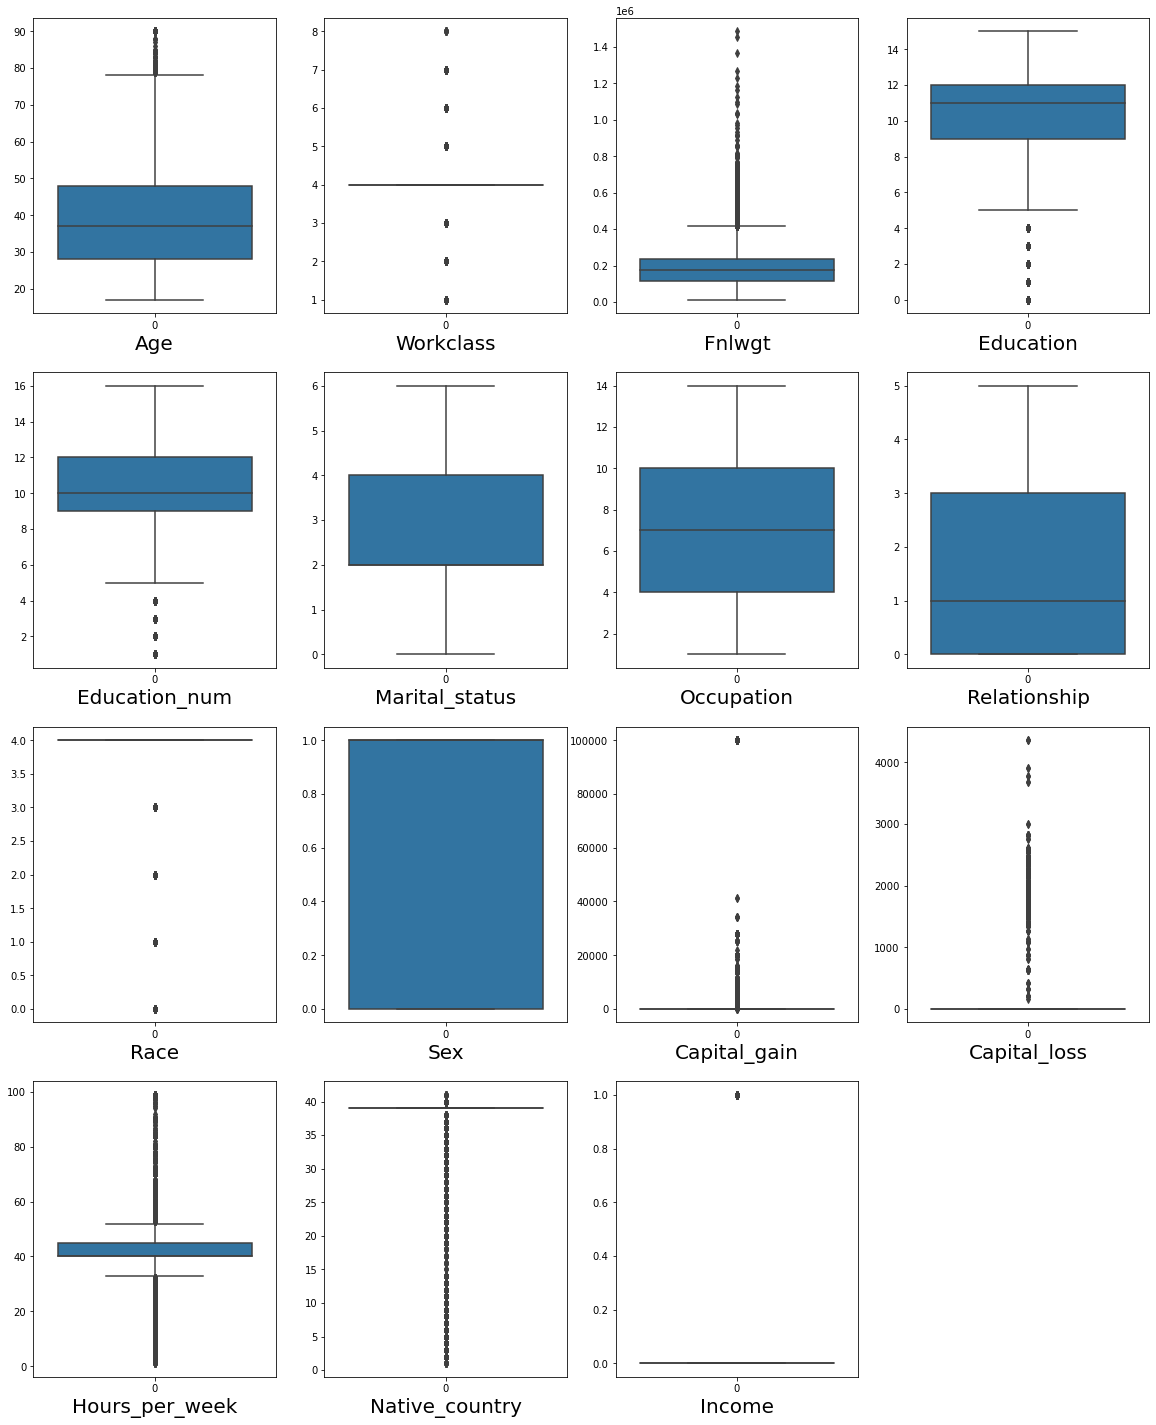

In [106]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=15:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features with continuous data containing outliers-

- Age
- Fnlwgt
- Education_num
- Hours_per_week
- Capital loss
- Capital gain

In [108]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(32560, 15)

In [109]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [110]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(32560, 15)
(27761, 15)


# 
The removal of these outliers is essential, the percentage loss is 14.74% which is slightly tolerable

# Divide Data Set into features and labels

In [112]:
y=data_new['Income']
x=data_new.drop(columns=['Income'])

In [113]:
#Confirming the skewness
x.skew().sort_values(ascending=False)

Capital_loss      29.509748
Capital_gain       4.929783
Relationship       0.753622
Fnlwgt             0.628251
Age                0.485065
Occupation         0.128371
Workclass          0.079454
Marital_status    -0.045580
Education_num     -0.146330
Hours_per_week    -0.359546
Sex               -0.688769
Education         -0.955598
Race              -2.586771
Native_country    -5.213119
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

Capital_loss   
Capital_gain      
Relationship           
Sex
Education            
Race                            
Native_country              

Amongst the above features, only Capital_loss and Capital_gain   are continous and their skewness need to be removed

# Transforming Data to remove skewness

In [115]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [116]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

Capital_loss      24.778601
Capital_gain       3.068642
Native_country     1.403089
Workclass          0.167679
Relationship       0.109745
Hours_per_week     0.105641
Education_num      0.026817
Age               -0.018085
Fnlwgt            -0.034491
Marital_status    -0.128385
Occupation        -0.146504
Education         -0.313570
Sex               -0.688769
Race              -2.524455
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [118]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Logistic Regression Model

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [120]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.8350441202953358 random_state 0
accuracy 0.8350441202953358 random_state 0
accuracy 0.823878984332793 random_state 1
accuracy 0.832703043399964 random_state 2
accuracy 0.8278408067711147 random_state 3
accuracy 0.8289213037997479 random_state 4
accuracy 0.8309022150189087 random_state 5
accuracy 0.8303619665045922 random_state 6
accuracy 0.8332432919142806 random_state 7
accuracy 0.8287412209616424 random_state 8
accuracy 0.8305420493426976 random_state 9
accuracy 0.8287412209616424 random_state 10
accuracy 0.8245993156852152 random_state 11
accuracy 0.833063209076175 random_state 12
accuracy 0.8264001440662705 random_state 13
accuracy 0.8314424635332253 random_state 14
accuracy 0.8370250315144967 random_state 15
accuracy 0.8370250315144967 random_state 15
accuracy 0.8283810552854313 random_state 16
accuracy 0.8289213037997479 random_state 17
accuracy 0.8325229605618585 random_state 18
accuracy 0.826580226904376 random_state 19
accuracy 0.8355843688096525 random_state 20
acc

In [121]:
#creating train-test-sloit using best random state observed(i.e.15)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=15)

In [122]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  83.70250315144968
[[4081  218]
 [ 687  567]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4299
           1       0.72      0.45      0.56      1254

    accuracy                           0.84      5553
   macro avg       0.79      0.70      0.73      5553
weighted avg       0.83      0.84      0.82      5553



# Using Decision Tree Classifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  81.59553394561499
[[3773  526]
 [ 496  758]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4299
           1       0.59      0.60      0.60      1254

    accuracy                           0.82      5553
   macro avg       0.74      0.74      0.74      5553
weighted avg       0.82      0.82      0.82      5553



# Using Random Forest CLassifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  85.95353862776878
[[4023  276]
 [ 504  750]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4299
           1       0.73      0.60      0.66      1254

    accuracy                           0.86      5553
   macro avg       0.81      0.77      0.78      5553
weighted avg       0.85      0.86      0.85      5553



# Using SVC

In [125]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  84.58490905816676
[[4089  210]
 [ 646  608]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4299
           1       0.74      0.48      0.59      1254

    accuracy                           0.85      5553
   macro avg       0.80      0.72      0.75      5553
weighted avg       0.84      0.85      0.83      5553



# Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.8021321911825836


In [135]:
scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr2.mean())

Cross validation score of Decision Tree Classifier:  0.8040416790570925


In [136]:
scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr3.mean())

Cross validation score of Random Forest Classifier:  0.8507619592908992


In [137]:
scr4=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr4.mean())

Cross validation score of SVC model:  0.8078238597824162


# 
Random Forest Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [139]:
RandomForestClassifier()

RandomForestClassifier()

In [141]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [142]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [144]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [147]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,GCV_pred)                     #Checking final accuracy

0.8562938951917882

# ROC AUC Plot

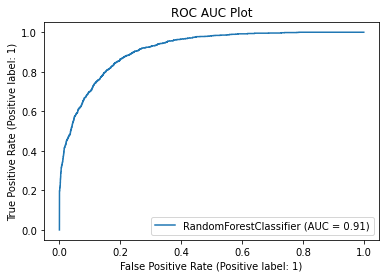

In [148]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# 
Final Accuracy is 85.6% and AUC score is 91%, which depicts that our model is working well

# Saving the Random Forest Classifier Model

In [149]:
filename='Census Income Project.pkl'
pickle.dump(LR, open(filename,'wb'))